In [79]:
%load_ext autoreload
%autoreload 2
import matplotlib.cm as cm
import networkx as nx
import numpy as np
import osmnx as ox
import pandas as pd
import collections
import data_loader
pd.set_option('mode.chained_assignment','raise')
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'0.10'

# San Francisco

## Load data
Note that the number of segment IDs provided in the Uber<->OSM mapping is higher than the number of segment IDs actually found in the speeds data.

In [25]:
data = data_loader.load_data_for_city('san-francisco')

Uber<->OSM mapping has 688983 junction IDs and 878234 segment IDs
Speeds has 5474128 rows, 214407 distinct segment IDs
OSM graph has 32497 nodes, 90240 edges


## Incompleteness of Uber data

Edges are black if they are present it at least one hour in the speeds data. Red edges are in the OSM map, but not anywhere in the speeds data.

Out of 90240 total edges in the OSM graph, 34440 are in the Uber data


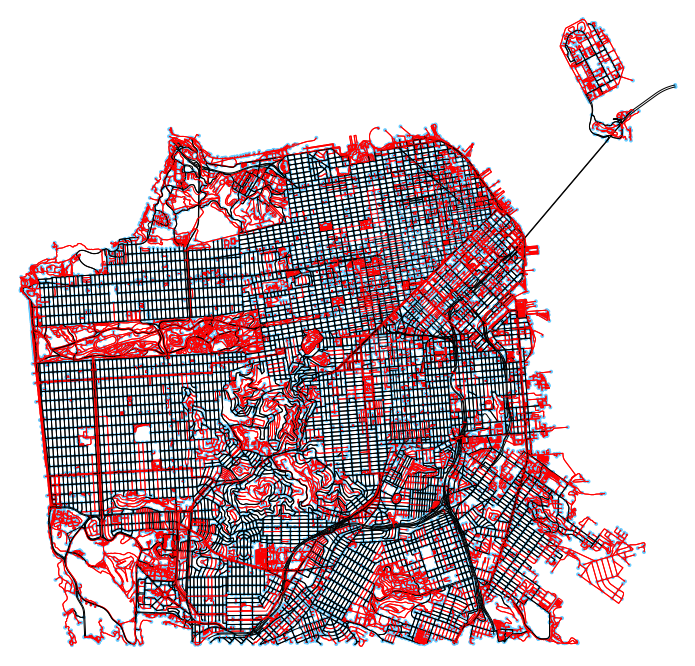

In [41]:
data_loader.plot_map_for_discrepancy(data)

## Merging the data

Only keep data that is common to both OSM and Uber datasets

In [64]:
data_loader.merge_uber_osm_data(data)

Dropped 0 vertices, 0 edges from graph
Dropped 0 Uber junctions and 0 Uber segments


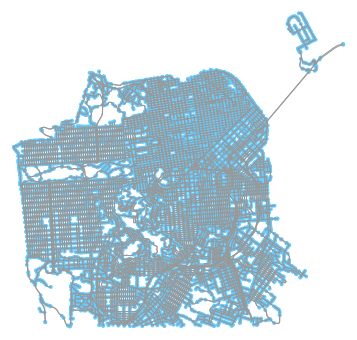

(<Figure size 574.162x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4aa58ba8>)

In [65]:
ox.plot_graph(data.graph)

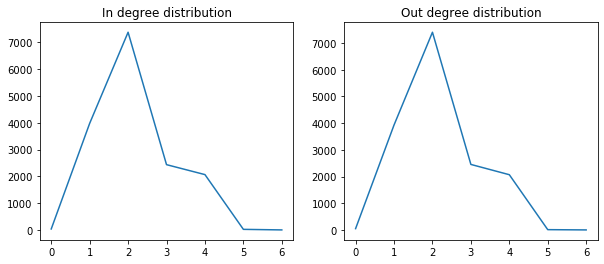

In [74]:
data_loader.plot_degree_distribution(data)

In [92]:
es = set((v1,v2) for (v1,v2,edge) in data.graph.edges(data=True))
es2 = [(v1,v2) for (v1,v2) in es if (v2,v1) in es]
for v1, v2 in es2:
    print(v1,v2)
    print(data.graph.get_edge_data(v1,v2))
    print(data.graph.get_edge_data(v2,v1))
    break

4177860395 6346560017
{0: {'osmid': 8918953, 'name': 'Day Street', 'highway': 'residential', 'oneway': False, 'length': 102.145, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3b5a1f9668>}}
{0: {'osmid': 8918953, 'name': 'Day Street', 'highway': 'residential', 'oneway': False, 'length': 102.145, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3b54005eb8>}}


In [7]:
speeds = pd.read_csv('movement-speeds-quarterly-by-hod-san-francisco-2019-Q2.csv.zip')

In [8]:
speeds

,year,quarter,hour_of_day,segment_id,start_junction_id,end_junction_id,speed_mph_mean,speed_mph_stddev,speed_mph_p50,speed_mph_p85
0,2019,2,16,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,27.540,3.553,27.102,31.084
1,2019,2,21,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,28.044,4.099,27.982,32.231
2,2019,2,9,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,28.345,3.709,28.280,31.994
3,2019,2,15,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,27.489,3.338,27.369,30.693
4,2019,2,8,f760abfc62a68da92286dd403a9e94df30e58eeb,73659050e57d4848d2e056d7dfa32fa68b1432c8,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,24.338,9.440,26.468,34.234
...,...,...,...,...,...,...,...,...,...,...
5474123,2019,2,10,49946741e5cf5fad08fcb8b1e80c83b00c5af714,8f7d70db5ef6c8dc6d11ca7bb85dccc92f633658,b588045bf2949b4219625511e65fcc065099ba4f,22.380,2.797,21.930,25.839
5474124,2019,2,14,49946741e5cf5fad08fcb8b1e80c83b00c5af714,b588045bf2949b4219625511e65fcc065099ba4f,8f7d70db5ef6c8dc6d11ca7bb85dccc92f633658,15.443,3.676,14.821,19.548
5474125,2019,2,8,49946741e5cf5fad08fcb8b1e80c83b00c5af714,8f7d70db5ef6c8dc6d11ca7bb85dccc92f633658,b588045bf2949b4219625511e65fcc065099ba4f,21.075,3.021,21.175,24.582
5474126,2019,2,13,49946741e5cf5fad08fcb8b1e80c83b00c5af714,b588045bf2949b4219625511e65fcc065099ba4f,8f7d70db5ef6c8dc6d11ca7bb85dccc92f633658,16.160,3.121,16.339,17.923


In [9]:
a = speeds[speeds['segment_id']=='f760abfc62a68da92286dd403a9e94df30e58eeb']

In [11]:
a.sort_values('hour_of_day')

,year,quarter,hour_of_day,segment_id,start_junction_id,end_junction_id,speed_mph_mean,speed_mph_stddev,speed_mph_p50,speed_mph_p85
19,2019,2,0,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,29.047,6.068,27.492,31.861
6,2019,2,1,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,31.710,5.887,31.195,37.464
27,2019,2,5,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,31.907,4.062,31.811,34.272
12,2019,2,6,f760abfc62a68da92286dd403a9e94df30e58eeb,73659050e57d4848d2e056d7dfa32fa68b1432c8,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,27.557,8.925,29.115,36.114
32,2019,2,6,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,29.940,4.058,29.324,33.967
14,2019,2,7,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,30.052,3.999,29.869,34.043
16,2019,2,7,f760abfc62a68da92286dd403a9e94df30e58eeb,73659050e57d4848d2e056d7dfa32fa68b1432c8,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,27.176,8.313,29.032,34.310
37,2019,2,8,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,28.387,4.152,28.228,32.522
4,2019,2,8,f760abfc62a68da92286dd403a9e94df30e58eeb,73659050e57d4848d2e056d7dfa32fa68b1432c8,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,24.338,9.440,26.468,34.234
2,2019,2,9,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,28.345,3.709,28.280,31.994


In [16]:
osm_nodes = pd.read_csv('movement-junctions-to-osm-nodes-san-francisco-2019.csv.zip')

In [17]:
osm_nodes

,junction_id,osm_node_id
0,d003d2aaaaf67abcd3731a1f67e23022490214c8,53032423
1,7eb8208f6ef1b2796509437254a0de736540597d,53072783
2,ed3fbd7093ea705a7b2516a7ed0b84e5edad7273,4912980927
3,f9efd88b18b1fe6378ea07283832b409dc3356d0,4915659718
4,dd9d97e1518716ace9ab9e9fc8d53599b6400fb9,4923982554
...,...,...
688978,273b4da86a9cf30b9ed97efe759784e536e548e3,62509504
688979,f51437760e068bc9bec5e93c5b9723eac98e34fe,86022506
688980,b836d3e67cc8abe21aa537fa8cc9f4e2745cf057,1703242283
688981,926e9e545587f3ac47826eddd89f354f467be837,1900656221


In [23]:
osm_nodes.drop_duplicates('junction_id')

,junction_id,osm_node_id
0,d003d2aaaaf67abcd3731a1f67e23022490214c8,53032423
1,7eb8208f6ef1b2796509437254a0de736540597d,53072783
2,ed3fbd7093ea705a7b2516a7ed0b84e5edad7273,4912980927
3,f9efd88b18b1fe6378ea07283832b409dc3356d0,4915659718
4,dd9d97e1518716ace9ab9e9fc8d53599b6400fb9,4923982554
...,...,...
688978,273b4da86a9cf30b9ed97efe759784e536e548e3,62509504
688979,f51437760e068bc9bec5e93c5b9723eac98e34fe,86022506
688980,b836d3e67cc8abe21aa537fa8cc9f4e2745cf057,1703242283
688981,926e9e545587f3ac47826eddd89f354f467be837,1900656221


In [15]:
osm_ways = pd.read_csv('movement-segments-to-osm-ways-san-francisco-2019.csv.zip')

In [16]:
osm_ways

,segment_id,osm_way_id
0,55c0708ff7f07745d3c55c35b671d14d130c6c9f,6384360
1,ddf1e8313d5e386c4056461be4a28f1278a2ec1c,7722701
2,080638a6ff9fd5c3885f5ec681901a30150d2141,7854810
3,31752678671b0acb833d59f4f57770bfc687ca39,8919748
4,a83e7ca5d85ea428d1d6fe7319606a27a0bcdd88,8923939
...,...,...
878229,63bc172a7caaebe3dedb0b555e53090173623ba7,183248311
878230,4e0af158f905ed79a3a821c9ed904c3e9b5ceb06,440517423
878231,494166461bef5fd4dc9ca108138e52e7a76ddab1,500240741
878232,180627769c9547292d3a308ec9b82720e71432d1,501836976


In [2]:
graph = nx.read_gpickle('san-francisco.gpickle.gz')

In [3]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

In [48]:
# Filter Uber Movement data for points within SF
# It also contains other parts of the bay area
osm_nodes = osm_nodes[osm_nodes['osm_node_id'].isin(graph.nodes)]
way_ids = {}
uber_way_ids = set(osm_ways['osm_way_id'])
edge_colors = []
for v1, v2, data in graph.edges(data=True):
    osmid = data['osmid']
    edge_in_uber = False
    if isinstance(osmid, list):
        for o in osmid:
            way_ids[o] = data
            if o in uber_way_ids: edge_in_uber = True
    else:
        way_ids[osmid] = data
        edge_in_uber = osmid in uber_way_ids
    edge_colors.append('red' if edge_in_uber else 'lightblue')
osm_ways = osm_ways[osm_ways['osm_way_id'].isin(way_ids)]

In [41]:
# Map ways to OSM data
def get_field(edge, field_name):
    return edge[field_name] if field_name in edge else None
osm_ways = osm_ways.assign(
    name = osm_ways['osm_way_id'].map(lambda way_id: get_field(way_ids[way_id], 'name')),
    highway = osm_ways['osm_way_id'].map(lambda way_id: get_field(way_ids[way_id], 'highway')),
    maxspeed = osm_ways['osm_way_id'].map(lambda way_id: get_field(way_ids[way_id], 'maxspeed')),
    length = osm_ways['osm_way_id'].map(lambda way_id: get_field(way_ids[way_id], 'length')),
)

In [42]:
osm_nodes

,junction_id,osm_node_id
9,b8e1a0a4bec282798bb5937dcaca5aa7ccd847a9,258886228
47,fafe8f87314bd81affaad6017d27a54f30265f2c,5424774889
142,454b7245b658e5918cd8f37db0babe32d11f2136,5443323638
221,e63d58507968350d9bcc8545f8c58f6285eeb31b,65285017
229,c671cf88348404afec9b2f6f942577056a719439,5440265279
...,...,...
688686,305a076550b945bb855e78d2490f78191deae2e0,65293212
688785,ecc606843fbd321b247a0d26dea10e4cd751ded0,65289489
688786,db205d9e58579d7ce6be1c3aa42fba0a876d7666,65302192
688811,522eb949ba120a3c37960b8de62b9f7c232c7a53,315432628


In [43]:
osm_ways

,segment_id,osm_way_id,name,highway,maxspeed,length
3,31752678671b0acb833d59f4f57770bfc687ca39,8919748,Italy Avenue,residential,None,75.861
8,f702ce0e8b061ba06f467dfa59f0b1268a45d778,565079465,None,service,None,45.913
49,312622616e30d74644945073f0e2991201c68b94,8919176,Montezuma Street,residential,None,214.665
86,4f99e07f922abbea743dfa01ed9b68e989fd7a23,52721873,4th Street,residential,10 mph,32.191
92,86962359f49152612b8de85ad3a41c8d967b6916,503951429,None,service,None,50.191
...,...,...,...,...,...,...
878079,c55467c0ddf7f2f8844422324cf273d5f8ff5dc0,147397959,20th Avenue,residential,None,32.531
878132,b0b57e855ef2fb0a7bf291b4cd1b91d1d984bc9f,678522938,Judah Street,tertiary,None,73.519
878166,0060360f72685c709025147952a6ca1f51566f9e,56029759,None,service,None,426.758
878169,62a0bdf9856e55e0c97eab731de11e6a2fa2f812,254759914,Bush Street,secondary,30 mph,86.703


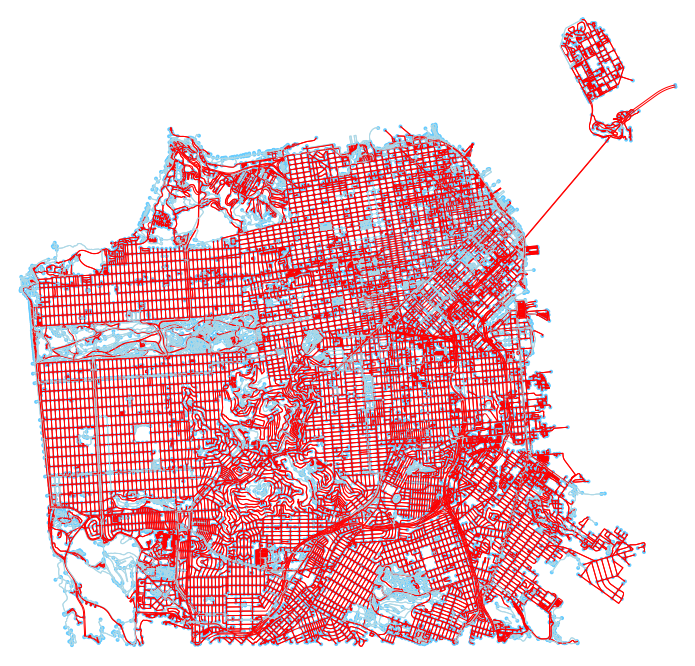

(<Figure size 1141.91x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff3f9551eb8>)

In [49]:
ox.plot_graph(graph, edge_color=edge_colors, fig_height=12)

In [35]:
edge_colors = []
for v1, v2, data in graph.edges(data=True):
    #edge = graph.edges[vertex_pair]
    #osmid = edge['osmid']
    print(data)
    break

{'osmid': 550660827, 'highway': 'footway', 'oneway': False, 'length': 10.824}
